# Note: 
We will use the CRISP-DM method for our analysis process. The process is as follows:

    1. Business Understanding
    2. Data Understanding
    3. Data Preparation
    4. Modeling
    5. Evaluation
    6. Deployment
    
We will analyze the FIFA 19 game's dataset

In [39]:
# import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')  

## Step 1: Business Understanding
Being a football fan and local famous striker means exploring FIFA19 player datsset could be so much fun. 

Focus on the following questions

Q1: What's the ratio of total wages/ total potential for clubs.

Q2: Which are the high spending clubs? Which clubs are the most economical ？

Q3: What's the age distribution like? Is it related to player's overall rating? if yes, how is it related?

Q4: How is a player's skils set influence his potential? Can we predict a player's potential based on his skills' set?


## Step 2: Data Understanding

In [2]:
# import the data
fifa19_player_df = pd.read_csv('data.csv')
fifa19_player_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# Find the total number of players
fifa19_player_df.shape[0]

18207

In [4]:
# Data types of each columns
fifa19_player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [5]:
# Features of the dataset
fifa19_player_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
# Check for missing values in each column
fifa19_player_df.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

## Step 3: Prepare Data
Perform the following data preprocessing steps before analyzing the data:

- Drop unnecessary columns
- Handle missing values, drop them if necessary
- Convert the data type from string to integer

In [7]:
# Drop unused columns
columns_to_drop = ['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo', 'Preferred Foot', 
                   'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From',
                   'Contract Valid Until', 'Height', 'Weight','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                   'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                   'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause']

fifa19_player_df.drop(columns_to_drop, axis=1, inplace=True)

In [8]:
# View the dataset
fifa19_player_df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,5.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,5.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,4.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,4.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [9]:
# Function to convert wage value from string to number
# Example: €110.5M -> 110.5 * 1000000
def str2number(amount):
    """
    This function convert amount string to float 
    
    Args:
        amount(str): Amount string with M & K as Abbreviation for Million and Thousands
    
    Output:
        float: A float number represents the numerical value of the input parameter amount(str)
    """
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

In [10]:
# Convert wage value from string to number
fifa19_player_df['Value_M'] = fifa19_player_df['Value'].apply(lambda x: str2number(x) / 1000000)
fifa19_player_df['Wage_K'] = fifa19_player_df['Wage'].apply(lambda x: str2number(x) / 1000)

# Drop original columns
fifa19_player_df.drop(['Value', 'Wage'], axis=1, inplace=True)

In [11]:
# Summary Statistics
fifa19_player_df.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,...,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,2.410696,9.731312
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,...,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,5.594933,21.999290
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,...,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.300000,1.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,...,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.675000,3.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,...,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,2.000000,9.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,...,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,118.500000,565.000000


**Observation:**
    - The highest player value is 118.8m and wage is 565k. The highest paid earners are Neymar Jr and Leo Messi             respectively.


In [12]:
# Dealing with missing values
missing_player_df = fifa19_player_df[fifa19_player_df['Agility'].isnull()]

In [13]:
# Summary statistics
missing_player_df.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K
count,48.000000,48.0,48.000000,48.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000,48.000000
mean,25.000000,62.0,66.833333,1562.229167,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.354375,1.687500
std,4.472136,0.0,5.272705,127.956981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117354,0.992659
min,17.000000,62.0,62.000000,1141.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,1.000000
25%,22.000000,62.0,62.000000,1506.750000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,1.000000
50%,25.000000,62.0,65.500000,1576.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337500,1.000000
75%,27.000000,62.0,70.000000,1664.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425000,2.000000
max,37.000000,62.0,82.000000,1740.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650000,5.000000


**Observation:** 
- Columns related to player's skill have 48 missing values. This means 48 players have this missing values. Reserve those players for Q1 and Q2 since there were no missing value in Value_M and Wage_K column.
 
- For Q3, drop those player rows since there were just too many missing values here.

## Step 4: Using the data analysis, answer the question


### Question 1: What's the ratio of total wages and total potential for clubs ?

### Ouestion 2: Which are the high spending clubs? Which clubs are the most economical ？

In [14]:
# Total wages by based on club
club_wages = fifa19_player_df.groupby('Club').sum()

In [15]:
# Total player count grouped by club
club_player_count = fifa19_player_df.groupby('Club').count()

In [16]:
# Number of clubs 
print('Number of clubs is {}'.format(club_player_count.shape[0]))

# Average number of players in each club
print('Average number players in each club is {}'.format(round(club_player_count['Age'].mean(),2)))

# Average wages
print('Total Average wage(K) potential ratio is {}'
      .format(round(club_wages['Wage_K'].sum() / club_wages['Potential'].sum(), 2)))

Number of clubs is 651
Average number players in each club is 27.6
Total Average wage(K) potential ratio is 0.14


In [17]:
# Potential wages
club_wages['Wage/Potential'] = club_wages['Wage_K'] / club_wages['Potential']

# Number of players in each club
club_wages['Player Number'] = club_player_count['Age']

# Average player age in each club
club_wages['Player Average Age'] = club_wages['Age'] / club_wages['Player Number']

In [18]:
# Sort values in descending order
club_wages.sort_values('Wage/Potential', ascending=False, inplace=True)

In [19]:
# View the data
club_wages.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K,Wage/Potential,Player Number,Player Average Age
Club,,,,,,,,,,,,,,,,,,,,,
Real Madrid,793,2582,2793,60025,69.0,106.0,94.0,1934.0,1750.0,1887.0,...,627.0,627.0,583.0,579.0,615.0,874.425,5017.0,1.796276,33,24.030303
FC Barcelona,787,2575,2815,60791,74.0,108.0,94.0,1974.0,1805.0,1850.0,...,599.0,601.0,623.0,615.0,617.0,852.600,4837.0,1.718295,33,23.848485
Juventus,679,2057,2138,47610,63.0,80.0,72.0,1517.0,1282.0,1583.0,...,419.0,402.0,386.0,438.0,450.0,704.475,3292.0,1.539757,25,27.160000
Manchester City,789,2532,2769,60617,69.0,104.0,92.0,1970.0,1726.0,1852.0,...,592.0,570.0,578.0,577.0,560.0,786.555,3741.0,1.351029,33,23.909091
Manchester United,817,2549,2728,62117,69.0,106.0,100.0,2054.0,1862.0,2056.0,...,547.0,545.0,563.0,537.0,565.0,588.850,3391.0,1.243035,33,24.757576


#### Observation:
The top five clubs according to highest wages paid to the players are as follows:
    1. Real Madrid
    2. FC Barcelona
    3. Juventus
    4. Manchester City
    5. Manchester United

Text(0.5,1,'Top 10 clubs spending wage(K) on players potential')

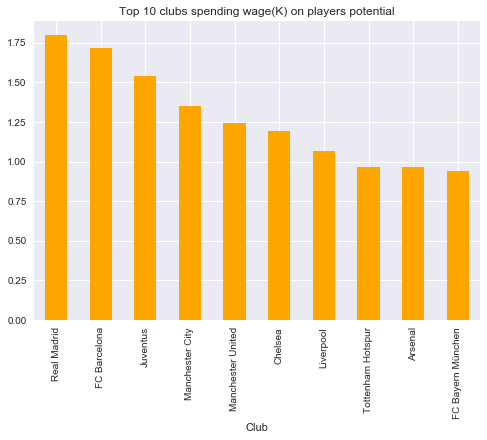

In [40]:
# Plot the top 10 clubs which spend most money on potential players
club_wages['Wage/Potential'].head(10).plot(kind='bar', color='Orange')
plt.title('Top 10 clubs spending wage(K) on players potential')

**OBSERVATION:**
- Top clubs such as Real Madrid, Barcelona, and clubs from English Premier League are willing to spend much more wage for high potential players than average clubs. This enables them to compete for the title in the league

Text(0.5,1,'Top 10 economical clubs ')

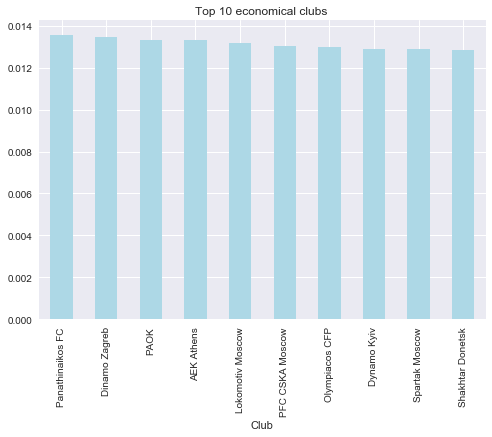

In [41]:
# Plot the top 10 clubs which are most economical
club_wages['Wage/Potential'].tail(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 economical clubs ')

**OBSERVATION:**
- Some economical clubs are those clubs whos names have never been heard of. Some of them are quite famous such as Dynamo Kyiv, and Shakthar Donetsk. From this we can conclude that there are players with good potential in those teams but they are underpayed. 

### Question 3: What's the age distribution like? How is it related to player's overall rating?

In [22]:
# Compute age count
age_count = fifa19_player_df['Age'].value_counts()
age_count.sort_index(ascending=True, inplace=True)

In [23]:
# Average overall rating grouped by 'Age'
age_mean = fifa19_player_df.groupby('Age').mean()

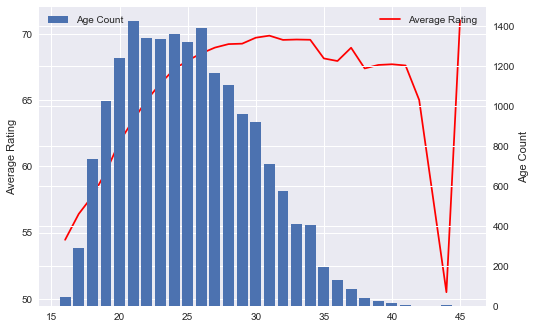

In [42]:
# Plot distribution of player's age
age_count_list = age_count.values.tolist()
age_overall_rating_list = age_mean['Overall'].values.tolist()

ages = age_count.index.values.tolist()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ages,age_overall_rating_list, color = 'red', label='Average Rating')
ax1.legend(loc=1)
ax1.set_ylabel('Average Rating')

ax2 = ax1.twinx()
plt.bar(ages, age_count_list, label='Age Count')
ax2.legend(loc=2)
ax2.set_ylabel('Age Count')
plt.show()

**OBSERVATION:**
- Most players are between 20-26 years old. Number of players start to decrease after 26 years old and speed up after   30. 
    - Hypothesis: Many young player didn't get enough opportunities to prove themselves and give up their dream as a       football player. 

- When a football player reaches their late 20s, they have gain enough experience and reaches peak of their rating.     The golden era of a football player starts here and ends when his age reaches 35. 
    - Hypothesis: At this age, his physical body condition drops quickly so does the average rating. 

- Quite a few numbers of players with age over 37, 38 years old. Its surprising because their rating still can remain   quite high. 

### Preparing Data for Question 4

In [25]:
# Drop unused columns
columns_to_drop_q4 = ['Name', 'Nationality', 'Club']
fifa19_player_df.drop(columns_to_drop_q4, axis=1, inplace=True)

In [26]:
# Dropt the missing values
fifa19_player_df.dropna(axis=0, how='any', inplace=True)

In [27]:
# Create new two new columns for work rate
fifa19_player_df['Work Rate Attack'] = fifa19_player_df['Work Rate'].map(lambda x: x.split('/')[0])
fifa19_player_df['Work Rate Defence'] = fifa19_player_df['Work Rate'].map(lambda x: x.split('/')[1])
fifa19_player_df.drop('Work Rate', axis=1, inplace=True)

In [28]:
# View the dataset
fifa19_player_df.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Position,Crossing,Finishing,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K,Work Rate Attack,Work Rate Defence
0,31,94,94,2202,5.0,4.0,4.0,RF,84.0,95.0,...,26.0,6.0,11.0,15.0,14.0,8.0,110.5,565.0,Medium,Medium
1,33,94,94,2228,5.0,4.0,5.0,ST,84.0,94.0,...,23.0,7.0,11.0,15.0,14.0,11.0,77.0,405.0,High,Low
2,26,92,93,2143,5.0,5.0,5.0,LW,79.0,87.0,...,33.0,9.0,9.0,15.0,15.0,11.0,118.5,290.0,High,Medium
3,27,91,93,1471,4.0,3.0,1.0,GK,17.0,13.0,...,13.0,90.0,85.0,87.0,88.0,94.0,72.0,260.0,Medium,Medium
4,27,91,92,2281,4.0,5.0,4.0,RCM,93.0,82.0,...,51.0,15.0,13.0,5.0,10.0,13.0,102.0,355.0,High,High


In [29]:
# One-hot encode the following categorical variables Position, Work Rate Attack, Work Rate Defence
one_hot_columns = ['Position', 'Work Rate Attack', 'Work Rate Defence']
fifa19_player_df = pd.get_dummies(fifa19_player_df, columns=one_hot_columns, prefix = one_hot_columns)

In [30]:
# Check the shape of the dataset
fifa19_player_df.shape

(18147, 76)

## 5. Train model and Measure Performance

**Create a model to predict a player's potential**

In [31]:
# Split the data into predictor and response variable

# Response variable 'players potential'
y = fifa19_player_df['Potential']

# Predictor variables
X = fifa19_player_df.drop(['Value_M', 'Wage_K', 'Potential', 'Overall'], axis=1)

In [32]:
# Divide the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [33]:
# Build a random forest model
ForestRegressor = RandomForestRegressor(n_estimators=500)
ForestRegressor.fit(X_train, y_train)

# Make predictions
y_test_preds = ForestRegressor.predict(X_test)

# Print the metrics
print("The R-squared score of the test data is ",r2_score(y_test, y_test_preds))
print("The mean squared error of the test data is ", mean_squared_error(y_test, y_test_preds))

The R-squared score of the test data is  0.8708172691445464
The mean squared error of the test data is  4.936701417814509


In [44]:
# Get the coefficient of the reqression model
coefs_df = pd.DataFrame()

coefs_df['Features'] = X_train.columns
coefs_df['Coefs'] = ForestRegressor.feature_importances_
coefs_df.sort_values('Coefs', ascending=False).head(10)

,Features,Coefs
14,BallControl,0.263825
18,Reactions,0.201864
0,Age,0.179282
32,StandingTackle,0.066609
38,GKReflexes,0.025880
34,GKDiving,0.023430
1,Special,0.018964
7,HeadingAccuracy,0.017072
26,Interceptions,0.015361
31,Marking,0.015253


**OBSERVATION:** 
Ball control, reactions, and age are the main three features that decides a player's potential. 
This is same to our perception. Young players with excellent ball control and fast reactions tends to give us an outstanding performance in football match.

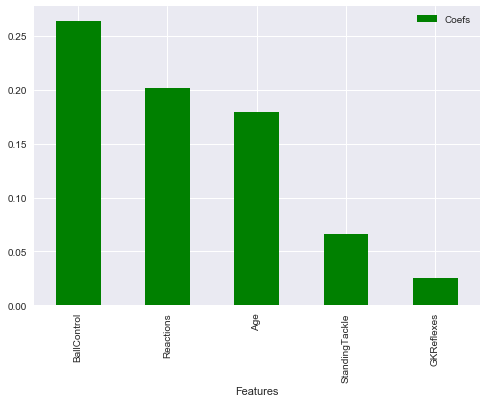

In [45]:
# Plot the top 5 coefficient
coefs_df.set_index('Features', inplace=True)
coefs_df.sort_values('Coefs', ascending=False).head(5).plot(kind='bar', color='green')

#### Note: 
The top 5 features with high coefficient are Ball control, reaction, age, standing tackle, and reflexes